## Predicting Diabetes

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

## Preprocessing and Exploratory Data Analysis

In [2]:
df = pd.read_csv("/Users/shirleyzulueta/Downloads/diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.shape

(100000, 9)

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [8]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [9]:
print(df.duplicated())
print(df.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool
3854


In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

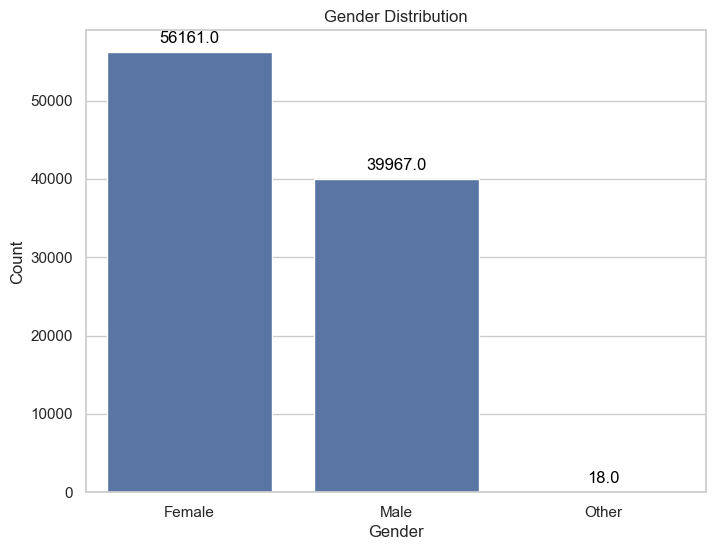

In [11]:
# Create a bar plot for gender distribution
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the bar plot
ax = sns.countplot(x='gender', data=df)

# Add data labels (count values) to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

In [12]:
# Drop 'Other' column
df = df[df['gender'] != 'Other']

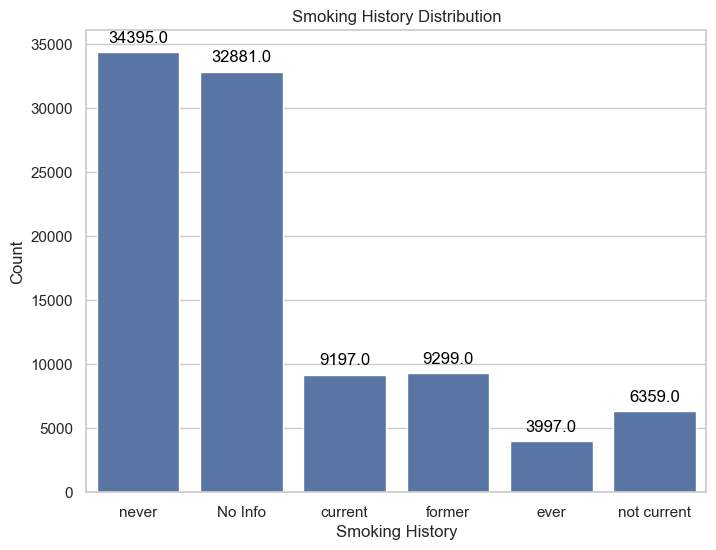

In [13]:
# Create a bar plot for gender distribution
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the bar plot
ax = sns.countplot(x='smoking_history', data=df)

# Add data labels (count values) to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Smoking History Distribution')
plt.xlabel('Smoking History')
plt.ylabel('Count')

# Show the plot
plt.show()

In [14]:
# Perform one-hot encoding for 'gender' and 'smoking_history'
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

In [15]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.00,0,1,25.19,6.60,140,0,False,False,False,False,True,False
1,54.00,0,0,27.32,6.60,80,0,False,False,False,False,False,False
2,28.00,0,0,27.32,5.70,158,0,True,False,False,False,True,False
3,36.00,0,0,23.45,5.00,155,0,False,True,False,False,False,False
4,76.00,1,1,20.14,4.80,155,0,True,True,False,False,False,False


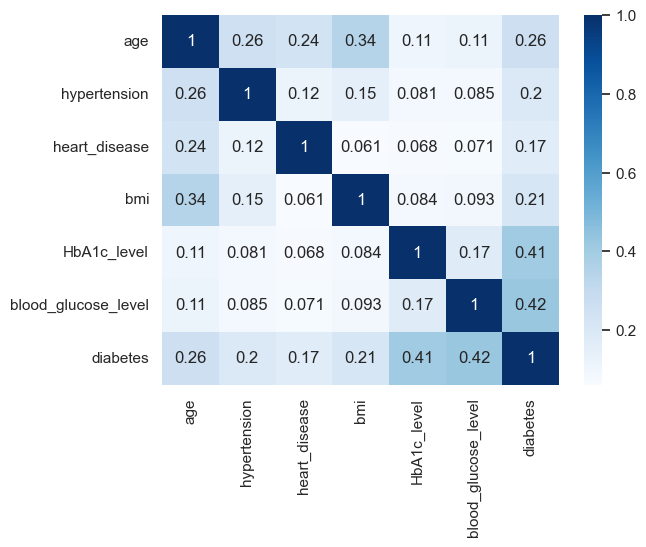

In [16]:
# Create a correlation matrix
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
corr_matrix = numeric_df.corr()  # Calculate the correlation matrix
sns.heatmap(corr_matrix, cmap = "Blues", annot=True)
plt.show()

##  There is a positive correlation between diabetes and blood glucose.
## There is also a positive correlation between diabetes and HbA1c levels.

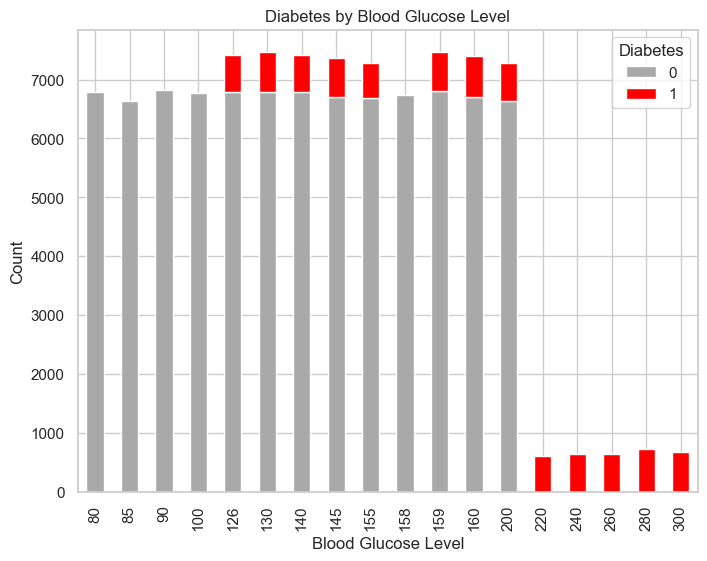

In [17]:
# Group the data by 'blood_glucose_level' and 'diabetes' and count occurrences
grouped = df.groupby(['blood_glucose_level', 'diabetes']).size().unstack().fillna(0)

# Create a custom color list for stacked bars (dark gray for 0, red for 1)
custom_colors = ['darkgray', 'red']

# Create a stacked bar chart with custom colors
ax = grouped.plot(kind='bar', stacked=True, color=custom_colors, figsize=(8, 6))

# Add labels and title
plt.xlabel('Blood Glucose Level')
plt.ylabel('Count')
plt.title('Diabetes by Blood Glucose Level')

# Show the plot
plt.legend(title='Diabetes', loc='upper right')
plt.show()

## The chart above shows that diabetes is associated with higher levels of blood glucose.

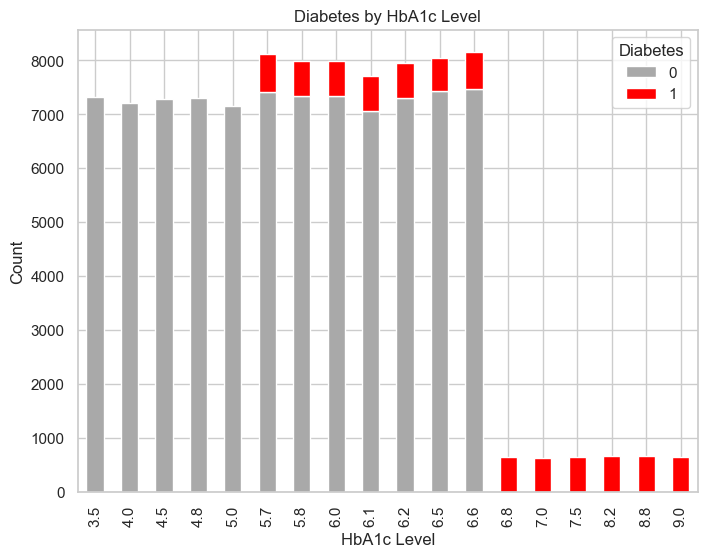

In [18]:
# Group the data by 'HbA1c level' and 'diabetes' and count occurrences
grouped = df.groupby(['HbA1c_level', 'diabetes']).size().unstack().fillna(0)

# Create a custom color list for stacked bars (dark gray for 0, red for 1)
custom_colors = ['darkgray', 'red']

# Create a stacked bar chart with custom colors
ax = grouped.plot(kind='bar', stacked=True, color=custom_colors, figsize=(8, 6))

# Add labels and title
plt.xlabel('HbA1c Level')
plt.ylabel('Count')
plt.title('Diabetes by HbA1c Level')

# Show the plot
plt.legend(title='Diabetes', loc='upper right')
plt.show()

## The chart above shows that diabetes is associated with higher HbA1c levels.

Text(0.5, 1.0, 'Histogram of Age with Diabetes')

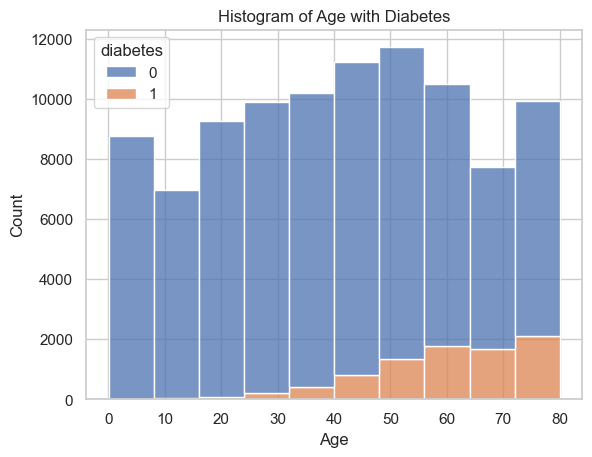

In [19]:
# Create a histogram with 'age' as the x-axis and 'diabetes' as the hue
sns.histplot(data=df, x='age', hue='diabetes', bins=10, multiple='stack')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age with Diabetes')

## The chart above shows the number of people with diabetes increases as age increases.

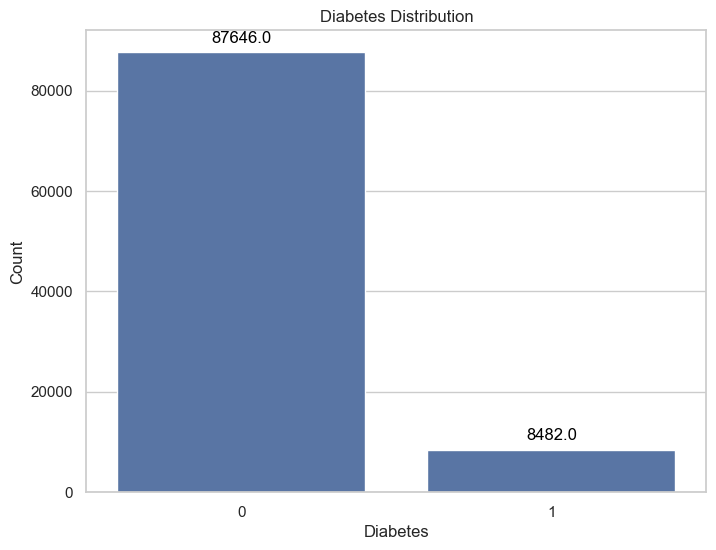

In [20]:
# Create a bar plot for gender distribution
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the bar plot
ax = sns.countplot(x='diabetes', data=df)

# Add data labels (count values) to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Diabetes Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')

# Show the plot
plt.show()

## There is a large imbalance between the number of people with diabetes and without diabetes. 
# SMOTE is used to balance the training dataset.

In [21]:
# Split data into features (X) and target (y)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance (if necessary)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:")
    print(confusion)

# Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model (if not already done)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [24]:
# Evaluate the Logistic Regression model on the test set
print("Logistic Regression Evaluation:")
evaluate_model(logistic_model, X_test_scaled, y_test)

Logistic Regression Evaluation:
Accuracy: 0.8852075314678041
Precision: 0.4270472895040369
Recall: 0.8706643151087595
F1 Score: 0.5730315341458697
ROC AUC Score: 0.8786417153289875
Confusion Matrix:
[[15538  1987]
 [  220  1481]]


# Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [26]:
print("Decision Tree Evaluation:")
evaluate_model(decision_tree_model, X_test_scaled, y_test)  # Use X_test_resampled and y_test

Decision Tree Evaluation:
Accuracy: 0.9441901591594716
Precision: 0.6712104689203926
Recall: 0.7236919459141682
F1 Score: 0.6964639321074965
ROC AUC Score: 0.8446419786632181
Confusion Matrix:
[[16922   603]
 [  470  1231]]


# Random Forest Model

In [27]:
# Create and train the Random Forest model (if not already done)
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [28]:
# Evaluate the Random Forest model on the test set
print("Random Forest Evaluation:")
evaluate_model(random_forest_model, X_test_scaled, y_test)

Random Forest Evaluation:
Accuracy: 0.9561011130760428
Precision: 0.7643429981492905
Recall: 0.7283950617283951
F1 Score: 0.7459361830222758
ROC AUC Score: 0.8532988147443686
Confusion Matrix:
[[17143   382]
 [  462  1239]]


## Logistic regression has the best recall and is the best indicator for predicting diabetes.
## Logistic regression also has the best ROC AUC score at about 88%, which suggests the best overall model performance.

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
random_forest_ensemble = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the ensemble model on the resampled training data
random_forest_ensemble.fit(X_train_resampled, y_train_resampled)

# Evaluate the ensemble model on the test set
print("Random Forest Ensemble Evaluation:")
evaluate_model(random_forest_ensemble, X_test_scaled, y_test)

Random Forest Ensemble Evaluation:
Accuracy: 0.9563611775720379
Precision: 0.7673697270471465
Recall: 0.7272192827748384
F1 Score: 0.7467552067612436
ROC AUC Score: 0.8529106399608858
Confusion Matrix:
[[17150   375]
 [  464  1237]]


## Random forest ensemble evaluation was performed to see if there is an improvement. Logistic regression still performed better with recall and ROC AUC score.

In [30]:
# Create and train the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the Neural Network model on the test set
print("Neural Network Evaluation:")
evaluate_model(nn_model, X_test_scaled, y_test)

Neural Network Evaluation:
Accuracy: 0.9200561739311349
Precision: 0.5322073841319718
Recall: 0.7965902410346855
F1 Score: 0.6380974805745232
ROC AUC Score: 0.8643150919866723
Confusion Matrix:
[[16334  1191]
 [  346  1355]]


In [31]:
# Get the coefficients assigned to each feature
feature_importance = logistic_model.coef_[0]

# Create a DataFrame to display feature names and coefficients
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': feature_importance})

# Sort the DataFrame to see the most important features
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print the feature importance
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                        Feature  Coefficient
4                   HbA1c_level         2.39
5           blood_glucose_level         1.32
0                           age         1.19
3                           bmi         0.66
10        smoking_history_never         0.23
7       smoking_history_current         0.18
1                  hypertension         0.18
9        smoking_history_former         0.16
6                   gender_Male         0.16
2                 heart_disease         0.14
8          smoking_history_ever         0.13
11  smoking_history_not current         0.11


## HbA1c levels, blood glucose levels, age, BMI, and never smoking are the most important features in the data set.
Logistic Regression is a useful algorithm for explainability. For example, as HbA1c level increases by 1 unit, the odds of having diabetes increase by a factor of approximately 2.39.
See Feature Importance table above.

In [32]:
# Convert X_train_resampled and X_test_scaled back to DataFrames if they are NumPy arrays
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Select the top 4 features based on their coefficients
selected_features = ['HbA1c_level', 'blood_glucose_level', 'age', 'bmi']

# Extract the selected features from the original dataset
X_selected = X_train_resampled_df[selected_features]
X_test_selected = X_test_scaled_df[selected_features]

# Create and train a new logistic regression model using the selected features
logistic_model_selected = LogisticRegression()
logistic_model_selected.fit(X_selected, y_train_resampled)

# Make predictions on the test set using the model with selected features
predictions_selected_logistic = logistic_model_selected.predict(X_test_selected)

# Evaluate the logistic regression model's performance
accuracy_selected_logistic = accuracy_score(y_test, predictions_selected_logistic)
precision_selected_logistic = precision_score(y_test, predictions_selected_logistic)
recall_selected_logistic = recall_score(y_test, predictions_selected_logistic)
f1_selected_logistic = f1_score(y_test, predictions_selected_logistic)
roc_auc_selected_logistic = roc_auc_score(y_test, predictions_selected_logistic)
confusion_matrix_selected_logistic = confusion_matrix(y_test, predictions_selected_logistic)

print("Logistic Regression with Top 4 Features Evaluation:")
print("Accuracy:", accuracy_selected_logistic)
print("Precision:", precision_selected_logistic)
print("Recall:", recall_selected_logistic)
print("F1 Score:", f1_selected_logistic)
print("ROC AUC Score:", roc_auc_selected_logistic)
print("Confusion Matrix:")
print(confusion_matrix_selected_logistic)


Logistic Regression with Top 4 Features Evaluation:
Accuracy: 0.8788619577655259
Precision: 0.41238839285714285
Recall: 0.8689006466784245
F1 Score: 0.5593188268684957
ROC AUC Score: 0.8743647313278
Confusion Matrix:
[[15419  2106]
 [  223  1478]]


## The logistic regression was ran again with the top features. The model did not see any improvement.

In [33]:
!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a function to evaluate and compare multiple models
def evaluate_and_compare_models(models, model_names, X_test, y_test):
    results = []
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        })
    
    results_df = pd.DataFrame(results)
    return results_df

# List of your models (e.g., logistic_model, decision_tree_model, nn_model)
models = [logistic_model, decision_tree_model, random_forest_model]

# List of model names
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]

# Evaluate and compare the models
results_df = evaluate_and_compare_models(models, model_names, X_test_scaled, y_test)

# Print the table using tabulate
table = tabulate(results_df, headers="keys", tablefmt="grid")

# Display the table
print(table)

+----+---------------------+------------+-------------+----------+------------+-----------+
|    | Model               |   Accuracy |   Precision |   Recall |   F1 Score |   ROC AUC |
+====+=====================+============+=============+==========+============+===========+
|  0 | Logistic Regression |   0.885208 |    0.427047 | 0.870664 |   0.573032 |  0.878642 |
+----+---------------------+------------+-------------+----------+------------+-----------+
|  1 | Decision Tree       |   0.94419  |    0.67121  | 0.723692 |   0.696464 |  0.844642 |
+----+---------------------+------------+-------------+----------+------------+-----------+
|  2 | Random Forest       |   0.956101 |    0.764343 | 0.728395 |   0.745936 |  0.853299 |
+----+---------------------+------------+-------------+----------+------------+-----------+


In [34]:
# Define a function to make predictions
def predict_diabetes(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender, smoking_history):
    # Map gender and smoking_history to one-hot encoded values
    gender_mapping = {'Male': 1, 'Female': 0}
    smoking_mapping = {'never': 1, 'current': 2, 'former': 3, 'not current': 4, 'No Info': 0}

    # Create a dictionary with user inputs
    user_data = {
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'bmi': [bmi],
        'HbA1c_level': [HbA1c_level],
        'blood_glucose_level': [blood_glucose_level],
        'gender_Male': [gender_mapping.get(gender, 0)],
        'smoking_history_current': [1 if smoking_history == 'current' else 0],
        'smoking_history_ever': [1 if smoking_history == 'ever' else 0],
        'smoking_history_former': [1 if smoking_history == 'former' else 0],
        'smoking_history_never': [1 if smoking_history == 'never' else 0],
        'smoking_history_not current': [1 if smoking_history == 'not current' else 0]
    }

    # Create a DataFrame from the user inputs
    user_df = pd.DataFrame(user_data)

    # Standardize numerical features using the same scaler used for training
    user_df_scaled = scaler.transform(user_df)  # Make sure 'scaler' is the one used in training

    # Make a prediction using the trained logistic regression model
    prediction = logistic_model.predict(user_df_scaled)

    # Return the prediction result (0 for no diabetes, 1 for diabetes)
    return prediction[0]

# Example usage:
age = 52
hypertension = 1
heart_disease = 0
bmi = 26
HbA1c_level = 5.4
blood_glucose_level = 108
gender = 'Male'  # 'Male' or 'Female'
smoking_history = 'never'  # 'never', 'current', 'former', 'not current', 'No Info'

result = predict_diabetes(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender, smoking_history)

if result == 0:
    print("No Diabetes")
else:
    print("Diabetes")

No Diabetes


# The above code provides ability to test out examples of whether a person has diabetes or no diabetes.